# Tokenisation subword de BERT
La tokenisation subword de BERT en français se base sur une technique appelée BPE (Byte-Pair Encoding) qui permet de découper les mots en sous-unités linguistiques plus petites, appelées subword tokens. Voici comment cela fonctionne :

1. **Construction du vocabulaire initial** : On commence avec un vocabulaire qui contient tous les caractères présents dans le texte, ainsi que les mots fréquents.

2. **Apprentissage du BPE** : Le modèle va itérativement chercher les paires de caractères les plus fréquentes dans le corpus et les fusionner en un nouveau caractère. Par exemple, si "e" et "t" sont souvent voisins, ils pourraient être fusionnés en un seul caractère, comme "et".

3. **Répétition de l'étape 2** : On continue à itérer jusqu'à ce qu'un certain critère soit atteint (par exemple, un nombre prédéfini d'itérations).

4. **Construction du vocabulaire final** : Une fois que le processus d'itération est terminé, on obtient un vocabulaire de subword tokens qui contient des sous-unités linguistiques comme "et", "un", "par", etc.

5. **Tokenisation des mots** : Lorsque l'on veut tokeniser un texte, on peut découper les mots en utilisant les subword tokens du vocabulaire obtenu à l'étape précédente. Par exemple, le mot "uniquement" pourrait être décomposé en "uni", "que", "ment".

Cela permet à BERT de traiter des mots qu'il n'a pas rencontrés pendant l'entraînement, en les décomposant en sous-unités plus petites qu'il connaît. Cela améliore la généralisation du modèle à des mots inconnus ou peu fréquents.

In [1]:
#Installer l'implémentation de huggingface.
!pip install pytorch-pretrained-bert

In [2]:
import torch
from pytorch_pretrained_bert import BertTokenizer

# Chargement du modèle pré-entraîné tokenizer (vocabulaire)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

* Appliquons le tokenizer à une phrase pour voir le résultat.

In [3]:
sentences='Our friends wont buy this analysis, let alone the next one we propose.'
# Imprimer la phrase originale.
print(' Original: ', sentences)

# Imprimer la phrase divisée en tokens.
print('Tokenized: ', tokenizer.tokenize(sentences))

# Imprimer la phrase associée aux identifiants des jetons.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentences)))

 Original:  Our friends wont buy this analysis, let alone the next one we propose.
Tokenized:  ['our', 'friends', 'won', '##t', 'buy', 'this', 'analysis', ',', 'let', 'alone', 'the', 'next', 'one', 'we', 'propose', '.']
Token IDs:  [2256, 2814, 2180, 2102, 4965, 2023, 4106, 1010, 2292, 2894, 1996, 2279, 2028, 2057, 16599, 1012]


* Récupérer la liste complète des "tokens" et les écrire dans des fichiers texte pour que nous puissions les consulter.

In [4]:
with open("vocabulary.txt", 'w') as f:

    # For each token...
    for token in tokenizer.vocab.keys():

        # Write it out and escape any unicode characters.
        f.write(token + '\n')


En parcourant le vocabulaire, je constate que :

* Les 999 premiers tokens (indexés 1) semblent être réservés, et la plupart sont de la forme [unused957].
    * 1 - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Les lignes 1000-1996 semblent être un ensemble de caractères individuels.
    * Elles ne semblent pas être triées par fréquence (par exemple, les lettres de l'alphabet sont toutes classées dans l'ordre).
* Le premier mot est "the" à la position 1997.
    * A partir de là, les mots semblent être triés par fréquence.
    * Les 18 premiers mots sont des mots entiers, puis le numéro 2016 est ##s, vraisemblablement le sous-mot le plus courant.
    * Le dernier mot entier se trouve à la position 29612, "necessitated" (nécessité)

Quelques inclusions amusantes :
* starbucks
* triasique
* abolitionniste
* 1679

### Caractères uniques
---------------------

Le code suivant imprime tous les jetons d'un seul caractère dans le vocabulaire, ainsi que tous les jetons d'un seul caractère précédés de '##'.

Il s'avère qu'il s'agit d'ensembles correspondants : pour chaque caractère unique, il existe une version "##". Il y a 997 tokens à caractère unique.

La cellule suivante itère sur le vocabulaire, en extrayant tous les jetons d'un seul caractère.

In [5]:
one_chars = []
one_chars_hashes = []

# Pour chaque élément du vocabulaire...
for token in tokenizer.vocab.keys():

    # Enregistrer tous les jetons d'un seul caractère.
    if len(token) == 1:
        one_chars.append(token)

    # Enregistrer les jetons d'un seul caractère précédés des deux hachages.
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)


In [6]:
print('Nombre de jetons à caractère unique:', len(one_chars), '\n')

# Imprimer tous les caractères simples, 40 par ligne.

# Pour chaque lot de 40 jetons...
for i in range(0, len(one_chars), 40):

    # Limiter l'indice de fin pour ne pas dépasser la fin de la liste.
    end = min(i + 40, len(one_chars) + 1)

    # Imprimer les jetons, séparés par un espace.
    print(' '.join(one_chars[i:end]))

Nombre de jetons à caractère unique: 997 

! " # $ % & ' ( ) * + , - . / 0 1 2 3 4 5 6 7 8 9 : ; < = > ? @ [ \ ] ^ _ ` a b
c d e f g h i j k l m n o p q r s t u v w x y z { | } ~ ¡ ¢ £ ¤ ¥ ¦ § ¨ © ª « ¬
® ° ± ² ³ ´ µ ¶ · ¹ º » ¼ ½ ¾ ¿ × ß æ ð ÷ ø þ đ ħ ı ł ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɛ ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ː ˡ ˢ ˣ ˤ α β γ δ
ε ζ η θ ι κ λ μ ν ξ ο π ρ ς σ τ υ φ χ ψ ω а б в г д е ж з и к л м н о п р с т у
ф х ц ч ш щ ъ ы ь э ю я ђ є і ј љ њ ћ ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ
ք ־ א ב ג ד ה ו ז ח ט י ך כ ל ם מ ן נ ס ע ף פ ץ צ ק ר ש ת ، ء ا ب ة ت ث ج ح خ د
ذ ر ز س ش ص ض ط ظ ع غ ـ ف ق ك ل م ن ه و ى ي ٹ پ چ ک گ ں ھ ہ ی ے अ आ उ ए क ख ग च
ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ ই উ এ ও ক খ গ চ ছ জ
ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப ம ய ர ல ள வ ா ி ு ே
ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད ན པ བ མ འ ར ལ ས မ ა
ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ ᄉ ᄊ ᄋ ᄌ ᄎ ᄏ ᄐ ᄑ ᄒ ᅡ ᅢ ᅥ ᅦ ᅧ ᅩ ᅪ ᅭ

In [7]:
print('Nombre de jetons dun seul caractère avec hachage:', len(one_chars_hashes), '\n')

# Imprimer tous les caractères simples, 40 par ligne.

# Supprimer les dièses, qui ne font qu'encombrer l'affichage.
tokens = [token.replace('##', '') for token in one_chars_hashes]

# Pour chaque lot de 40 jetons...
for i in range(0, len(tokens), 40):

    # Limiter l'indice de fin pour ne pas dépasser la fin de la liste.
    end = min(i + 40, len(tokens) + 1)

    # Imprimer les jetons, séparés par un espace.
    print(' '.join(tokens[i:end]))

Nombre de jetons dun seul caractère avec hachage: 997 

s a e i n o d r y t l m u h k c g p 2 z 1 b 3 f 4 6 7 x v 8 5 9 0 w j q ° ₂ а и
² ₃ ı ₁ ⁺ ½ о ه ي α е د ن ν ø р ₄ ₀ ر я ³ ι ł н ᵢ ₙ ß ة ς م − т ː ل ь к ♭ η ی в
ا × ¹ ы ה ɛ л ! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ ¡
¢ £ ¤ ¥ ¦ § ¨ © ª « ¬ ® ± ´ µ ¶ · º » ¼ ¾ ¿ æ ð ÷ þ đ ħ ŋ œ ƒ ɐ ɑ ɒ ɔ ɕ ə ɡ ɣ ɨ
ɪ ɫ ɬ ɯ ɲ ɴ ɹ ɾ ʀ ʁ ʂ ʃ ʉ ʊ ʋ ʌ ʎ ʐ ʑ ʒ ʔ ʰ ʲ ʳ ʷ ʸ ʻ ʼ ʾ ʿ ˈ ˡ ˢ ˣ ˤ β γ δ ε ζ
θ κ λ μ ξ ο π ρ σ τ υ φ χ ψ ω б г д ж з м п с у ф х ц ч ш щ ъ э ю ђ є і ј љ њ ћ
ӏ ա բ գ դ ե թ ի լ կ հ մ յ ն ո պ ս վ տ ր ւ ք ־ א ב ג ד ו ז ח ט י ך כ ל ם מ ן נ ס
ע ף פ ץ צ ק ר ש ת ، ء ب ت ث ج ح خ ذ ز س ش ص ض ط ظ ع غ ـ ف ق ك و ى ٹ پ چ ک گ ں ھ
ہ ے अ आ उ ए क ख ग च ज ट ड ण त थ द ध न प ब भ म य र ल व श ष स ह ा ि ी ो । ॥ ং অ আ
ই উ এ ও ক খ গ চ ছ জ ট ড ণ ত থ দ ধ ন প ব ভ ম য র ল শ ষ স হ া ি ী ে க ச ட த ந ன ப
ம ய ர ல ள வ ா ி ு ே ை ನ ರ ಾ ක ය ර ල ව ා ก ง ต ท น พ ม ย ร ล ว ส อ า เ ་ ། ག ང ད
ན པ བ མ འ ར ལ ས မ ა ბ გ დ ე ვ თ ი კ ლ მ ნ ო რ ს ტ უ ᄀ ᄂ ᄃ ᄅ ᄆ ᄇ 

In [8]:
print('Les deux séries sont-elles identiques ??', set(one_chars) == set(tokens))

Les deux séries sont-elles identiques ?? True


### Subwords vs. Whole-words
Let's gather some statistics on the vocabulary.



Longueur maximale du jeton: 18


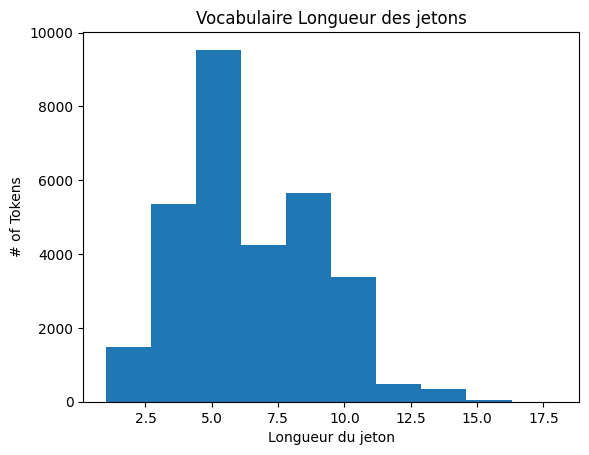

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np





# Mesurer la longueur de chaque token dans le vocabulaire.
token_lengths = [len(token) for token in tokenizer.vocab.keys()]

# Tracer le nombre de jetons de chaque longueur.
plt.hist(token_lengths)
plt.title('Vocabulaire Longueur des jetons')
plt.xlabel('Longueur du jeton')
plt.ylabel('# of Tokens')

print('Longueur maximale du jeton:', max(token_lengths))

Examinons uniquement les jetons qui commencent par "##".

In [10]:
num_subwords = 0

subword_lengths = []

# Pour chaque élément du vocabulaire...
for token in tokenizer.vocab.keys():

    # Si c'est un sous-mot...
    if len(token) >= 2 and token[0:2] == '##':

        # Comptabiliser tous les sous-mots
        num_subwords += 1

        # Mesurer la longueur du sous-mot (sans les hachages)
        length = len(token) - 2

        # Enregistrez les longueurs.
        subword_lengths.append(length)


Combien y a-t-il de jetons "##" par rapport au vocabulaire complet ?

In [11]:
vocab_size = len(tokenizer.vocab.keys())

print('Nombre de sous-mots: {:,} of {:,}'.format(num_subwords, vocab_size))

# Calculer le pourcentage de mots qui sont des sous-mots '##'.
prcnt = float(num_subwords) / vocab_size * 100.0

print('%.1f%%' % prcnt)

Nombre de sous-mots: 5,828 of 30,522
19.1%


Tracer les longueurs des sous-mots (sans les deux caractères '##').

Text(0, 0.5, '# of ## Subwords')

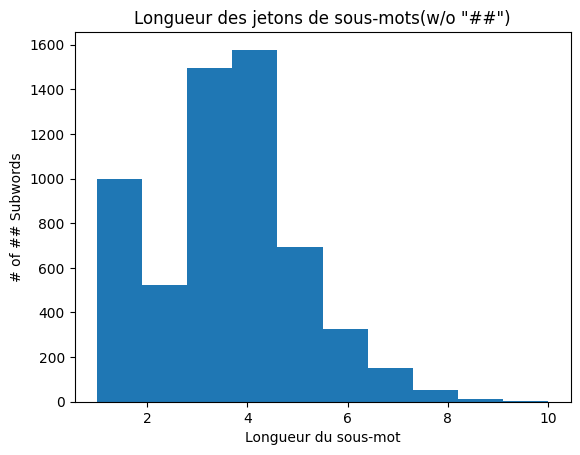

In [12]:
plt.hist(subword_lengths)
plt.title('Longueur des jetons de sous-mots(w/o "##")')
plt.xlabel('Longueur du sous-mot')
plt.ylabel('# of ## Subwords')

### Misspellings

In [13]:
'misspelled' in tokenizer.vocab # Right

False

In [14]:
'mispelled' in tokenizer.vocab # Wrong

False

In [15]:
'government' in tokenizer.vocab # Right

True

In [16]:
'goverment' in tokenizer.vocab # Wrong

False

In [17]:
'beginning' in tokenizer.vocab # Right

True

In [18]:
'begining' in tokenizer.vocab # Wrong

False

In [19]:
'separate' in tokenizer.vocab # Right

True

In [20]:
'seperate' in tokenizer.vocab # Wrong

False

Qu'en est-il des contractions ?

In [21]:
"can't" in tokenizer.vocab

False

In [22]:
"cant" in tokenizer.vocab

False

In [23]:
"can" in tokenizer.vocab

True

Sous-mots de début et de milieu de phrase ###

Pour les caractères simples, il existe à la fois le caractère individuel et la version "##" pour chaque caractère. En est-il de même pour les sous-mots ?

In [24]:
# Pour chaque élément du vocabulaire...
for token in tokenizer.vocab.keys():

    # Si c'est un sous-mot...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Na pas trouvé de jeton pour', token[2:])
            break

Na pas trouvé de jeton pour ly


In [25]:
'##ly' in tokenizer.vocab

True

In [26]:
'ly' in tokenizer.vocab

False

### Noms

In [27]:
!pip install wget

In [28]:
import wget
import random

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names (1).txt'

In [29]:
# Les lire dans.
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

names = []

# Décoder les noms, les convertir en minuscules et supprimer les nouvelles lignes.
for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print('Nombre de noms: {:,}'.format(len(names)))
print('Exemple:', random.choice(names))


Nombre de noms: 21,985
Exemple: pelletier


In [30]:
num_names = 0

# Pour chaque nom de notre liste...
for name in names:

    # Si c'est dans le vocabulaire...
    if name in tokenizer.vocab:
        # Faites le décompte.
        num_names += 1

print('{:,} noms dans le vocabulaire'.format(num_names))

3,869 noms dans le vocabulaire


### Numéros

In [31]:
# Comptez le nombre de chiffres dans le vocabulaire.
count = 0

# Pour chaque élément du vocabulaire...
for token in tokenizer.vocab.keys():

    # Tally s'il s'agit d'un nombre.
    if token.isdigit():
        count += 1

        # Des nombres >= 10,000 ?
        if len(token) > 4:
            print(token)

print('Le vocabulaire comprend {:,} chiffres.'.format(count))

Le vocabulaire comprend 881 chiffres.
